## Guided Project: Exploring Ebay Car Sales Data

In this project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset is downloaded from Kaggle
The data dictionary provided with data is as follows:

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

autos = pd.read_csv('autos.csv', encoding  = 'Latin-1')

In [3]:
#Checking for shape and quality
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

The dataset have 20 columns and 50000 rows. 
Some columns have null values, but none have more than ~20% null values

In [4]:
#Discovering the first rows
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We have different type of data to be preapared and cleaned for better analysis.
The columns to be changed to snakecase for better handelling.

In [5]:
#show the columns names 
autos_columns = autos.columns
autos_columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
#Creating function to change the case type
from functools import reduce
new_columns = []

def change_case(str): 
      
    return reduce(lambda x, y: x + ('_' if y.isupper() else '') + y, str).lower() 
for name in autos.columns:     
    a = change_case(name) 
    new_columns.append(a)
#Checking the data
autos.columns = new_columns
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_p_s', 'model',
       'odometer', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [7]:
#Get to the data statistics
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Our initial observations:

- There are a number of text columns where all (or nearly all) of the values are the same:
  - seller
  - offer_type
- The num_photos column looks odd, we'll need to investigate this further.
- The price and odmeter column are numeric but the statistics are NaN, they are to be cleaned.

In [8]:
#Checkin the column price
autos['price'].head()

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [9]:
#Cleaning the column prices an column odometer
#Convert to numeric
autos['price'] = autos['price'].str.replace('$', '').str.replace(',','').astype(int)
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '').astype(int)

In [10]:
#Checking the price column
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [11]:
#rename the odometer column name and check
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)
autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

## Exploring the data
Let's continue exploring the data, specifically looking for data that doesn't look right. We'll start by analyzing the odometer_km and price columns

In [12]:
#how many unique price 
autos['price'].unique().shape

(2357,)

In [13]:
#Stats data 
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [14]:
#distribuation of head price numbers
autos['price'].value_counts().sort_index(ascending=True).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

In [15]:
#distribuation of tail price numbers
autos['price'].value_counts().sort_index(ascending=False).head(10)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

There are a number of listings with prices below \$30, including about 1,500 at \$0. There are also a small number of listings with very high values, including 14 at around or over $1 million.

Given that eBay is an auction site, there could legitimately be items where the opening bid is \$1. We will keep the \$1 items, but remove anything above \$350,000, since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [16]:
#Removing outliers drom prices
autos = autos[autos['price'].between(1,350000)]

In [17]:
#checkin the stats
autos['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

In [18]:
#discovering data of odometer_km 
autos['odometer_km'].unique().shape

(13,)

In [19]:
#Stats data 
autos['odometer_km'].describe()

count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.
The statistics looks conveniant.

## Preparing the dates columns


In [20]:
#Preparing of dates values
crawled = autos['date_crawled'].str[:10]
created = autos['date_created'].str[:10]
last_seen = autos['last_seen'].str[:10]

In [21]:
#Converting of dates columns to DataFrame for visualization
df1 = pd.DataFrame(last_seen.value_counts(normalize=True, dropna=False).sort_index())
df2 = pd.DataFrame(created.value_counts(normalize=True, dropna=False).sort_index())
df3 = pd.DataFrame(crawled.value_counts(normalize=True, dropna=False).sort_index())
df2.head()

,date_created
2015-06-11,0.000021
2015-08-10,0.000021
2015-09-09,0.000021
2015-11-10,0.000021
2015-12-05,0.000021


In [30]:
#Converting the date index to a column for easy data manipulation
import numpy as np
import datetime as dt
df1['date'] = df1.index
df2['date'] = df2.index
df3['date'] = df3.index
df2

,date_created,date
2015-06-11,0.000021,2015-06-11
2015-08-10,0.000021,2015-08-10
2015-09-09,0.000021,2015-09-09
2015-11-10,0.000021,2015-11-10
2015-12-05,0.000021,2015-12-05
2015-12-30,0.000021,2015-12-30
2016-01-03,0.000021,2016-01-03
2016-01-07,0.000021,2016-01-07
2016-01-10,0.000041,2016-01-10
2016-01-13,0.000021,2016-01-13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f178d56a438>],
      dtype=object)

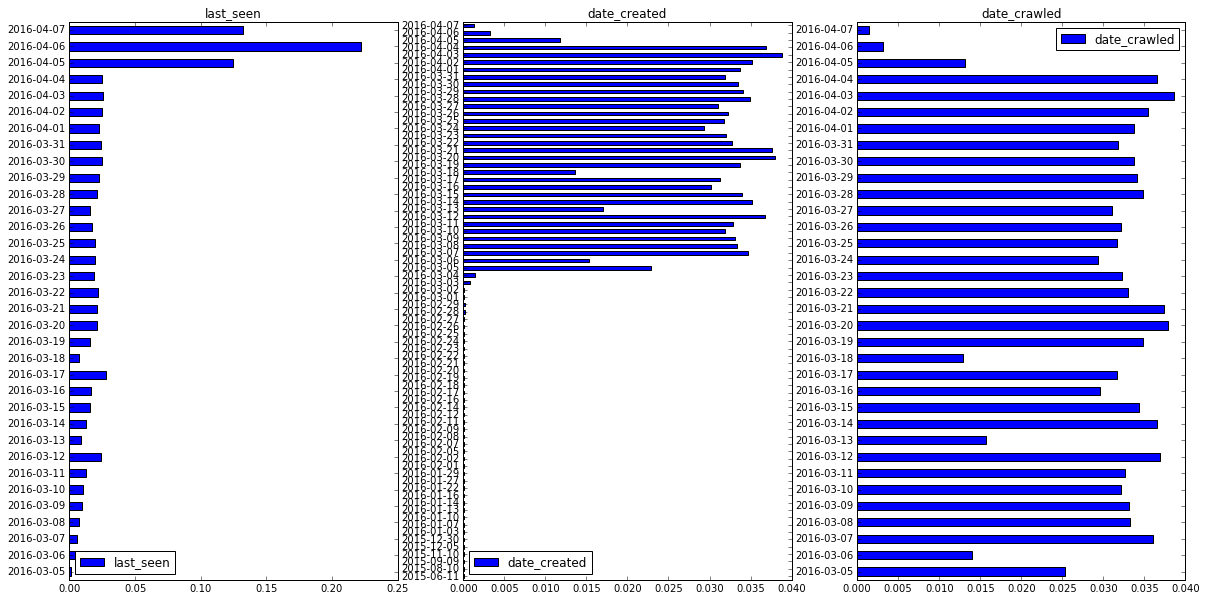

In [32]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches((20, 10))

df1.plot(kind="barh", ax=axes[0], subplots=True)
df2.plot(kind="barh", ax=axes[1], subplots=True)
df3.plot(kind="barh", ax=axes[2], subplots=True)

Looks like the site was crawled daily over roughly a one month period in March and April 2016. The distribution of listings crawled on each day is roughly uniform.

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [35]:
autos["year_of_registration"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: year_of_registration, dtype: float64

The year that the car was first registered will likely indicate the age of the car. Looking at this column, we note some odd values. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future

## Dealing with Incorrect Registration Year Data

Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values. Let's determine what percentage of our data has invalid values in this column:

In [37]:
# Many ways to select rows in a dataframe that fall within a value range for a column.
# Using `Series.between()` is one way.
autos = autos[autos["year_of_registration"].between(1900,2016)]
autos["year_of_registration"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: year_of_registration, dtype: float64

It appears that most of the vehicles were first registered in the past 20 years

## Exploring Price by Brand

In [38]:
autos["brand"].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [39]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [40]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'audi': 9336,
 'bmw': 8332,
 'ford': 3749,
 'mercedes_benz': 8628,
 'opel': 2975,
 'volkswagen': 5402}

Of the top 5 brands, there is a distinct price gap:

- Audi, BMW and Mercedes Benz are more expensive
- Ford and Opel are less expensive
- Volkswagen is in between - this may explain its popularity, it may be a 'best of 'both worlds' option.

## Exploring Mileage

In [42]:
bmp_series = pd.Series(brand_mean_prices)
pd.DataFrame(bmp_series, columns=["mean_price"])

,mean_price
audi,9336
bmw,8332
ford,3749
mercedes_benz,8628
opel,2975
volkswagen,5402


In [43]:
brand_mean_mileage = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

In [44]:
brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [45]:
brand_info["mean_price"] = mean_prices
brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.